In [ ]:
pip install python-louvain


In [1]:
import sys
sys.path.insert(0, "/home/brandm/Documents/Tesis/conflictmodel/conflictmodel")

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import community
import seaborn as sns
import visualization as vzl

In [3]:
import pandas as pd

# Single frame

In [111]:
matrix_arr = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/matrix.npy')

In [112]:
len(matrix_arr)

1048

In [186]:
matrix = matrix_arr[850]

In [134]:
N =len(matrix)

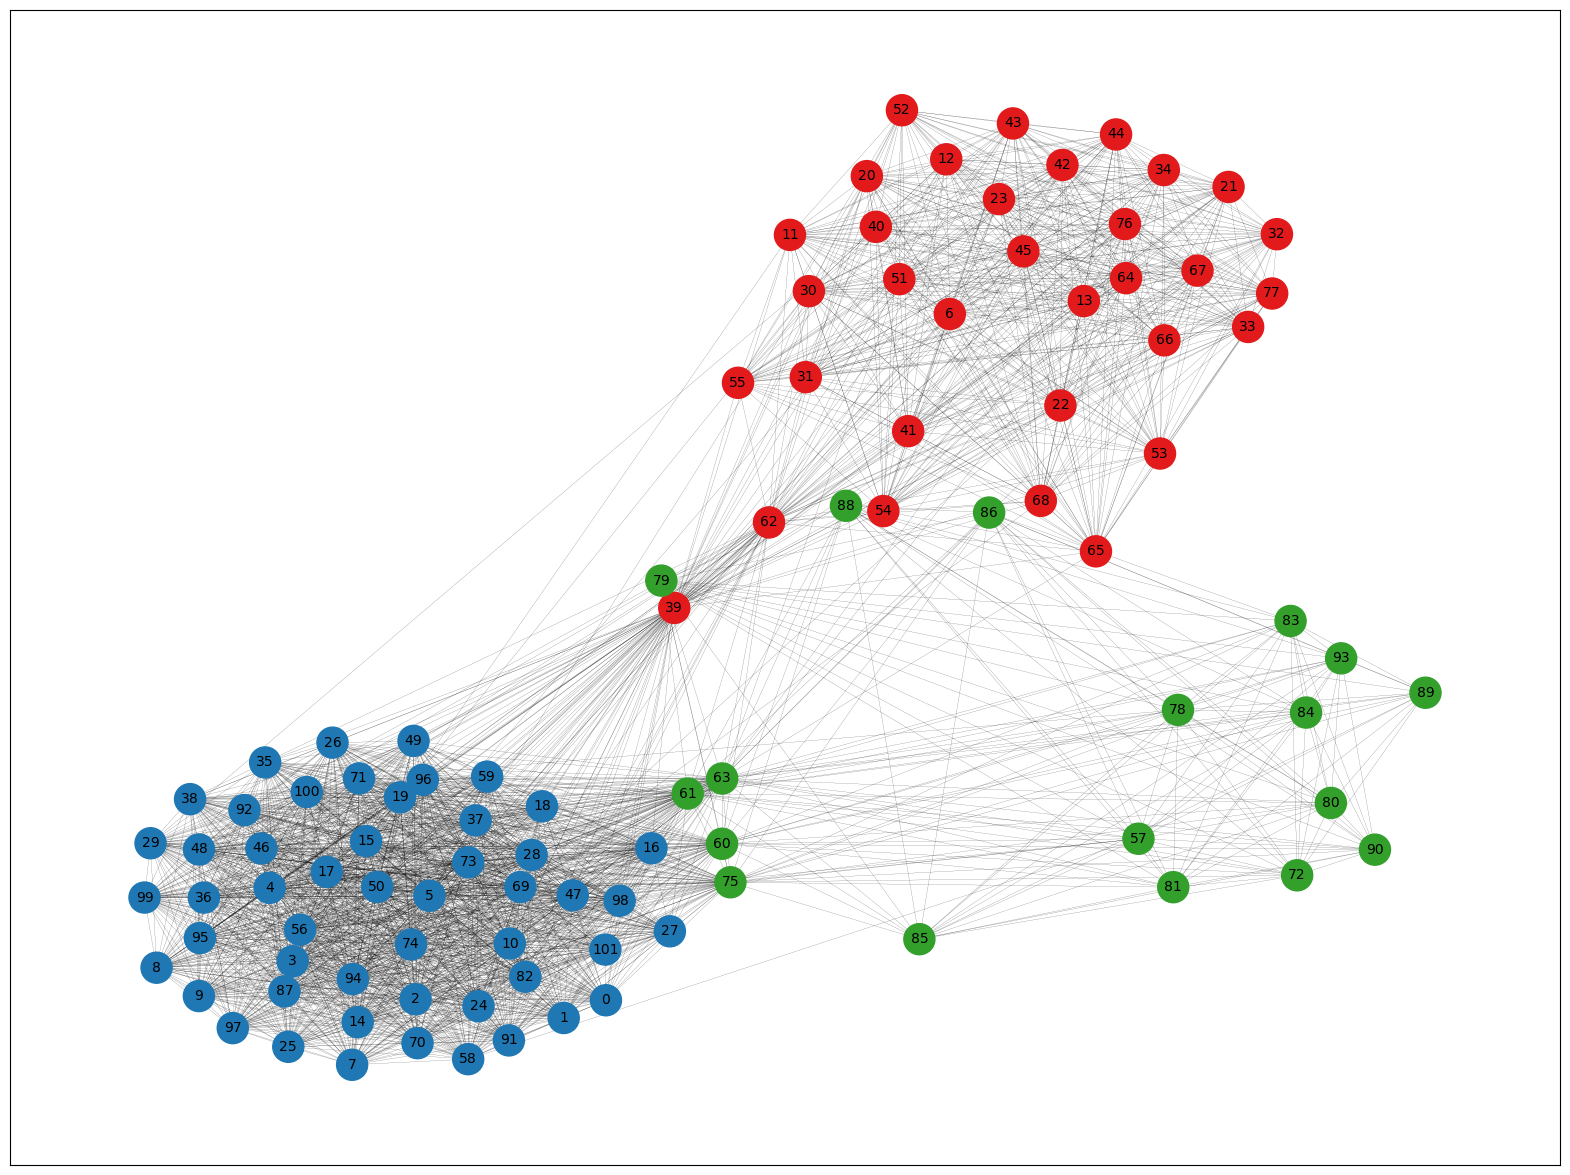

In [183]:
# Assign a distinct color to each cluster
#cluster_colors = sns.color_palette('hls', n_colors=N).as_hex()
cluster_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6']

G = nx.Graph()
# Add nodes to the graph
G.add_nodes_from(range(N))

# Add edges to the graph based on the matrix
for i in range(N):
    for j in range(N):
        if i != j and matrix[i, j] >= 0.5:  # Exclude self-edges
            G.add_edge(i, j, weight=matrix[i, j])

# Detect clusters and color nodes accordingly
partition = community.best_partition(G)
node_colors = [cluster_colors[partition[node]] for node in G.nodes()]
# Use spring_layout for better node positioning
pos = nx.fruchterman_reingold_layout(G,k=1, seed = 59)
node_sizes = 500  # Change node size here

# Plot the graph
plt.figure(figsize=(20, 15), facecolor='white')  # Adjust the figure size if desired
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=0.1)
nx.draw_networkx_labels(G, pos, font_weight='medium', font_size=10)
#plt.title('Emergence of clusters', fontsize=25)
#plt.axis('off')
plt.show()


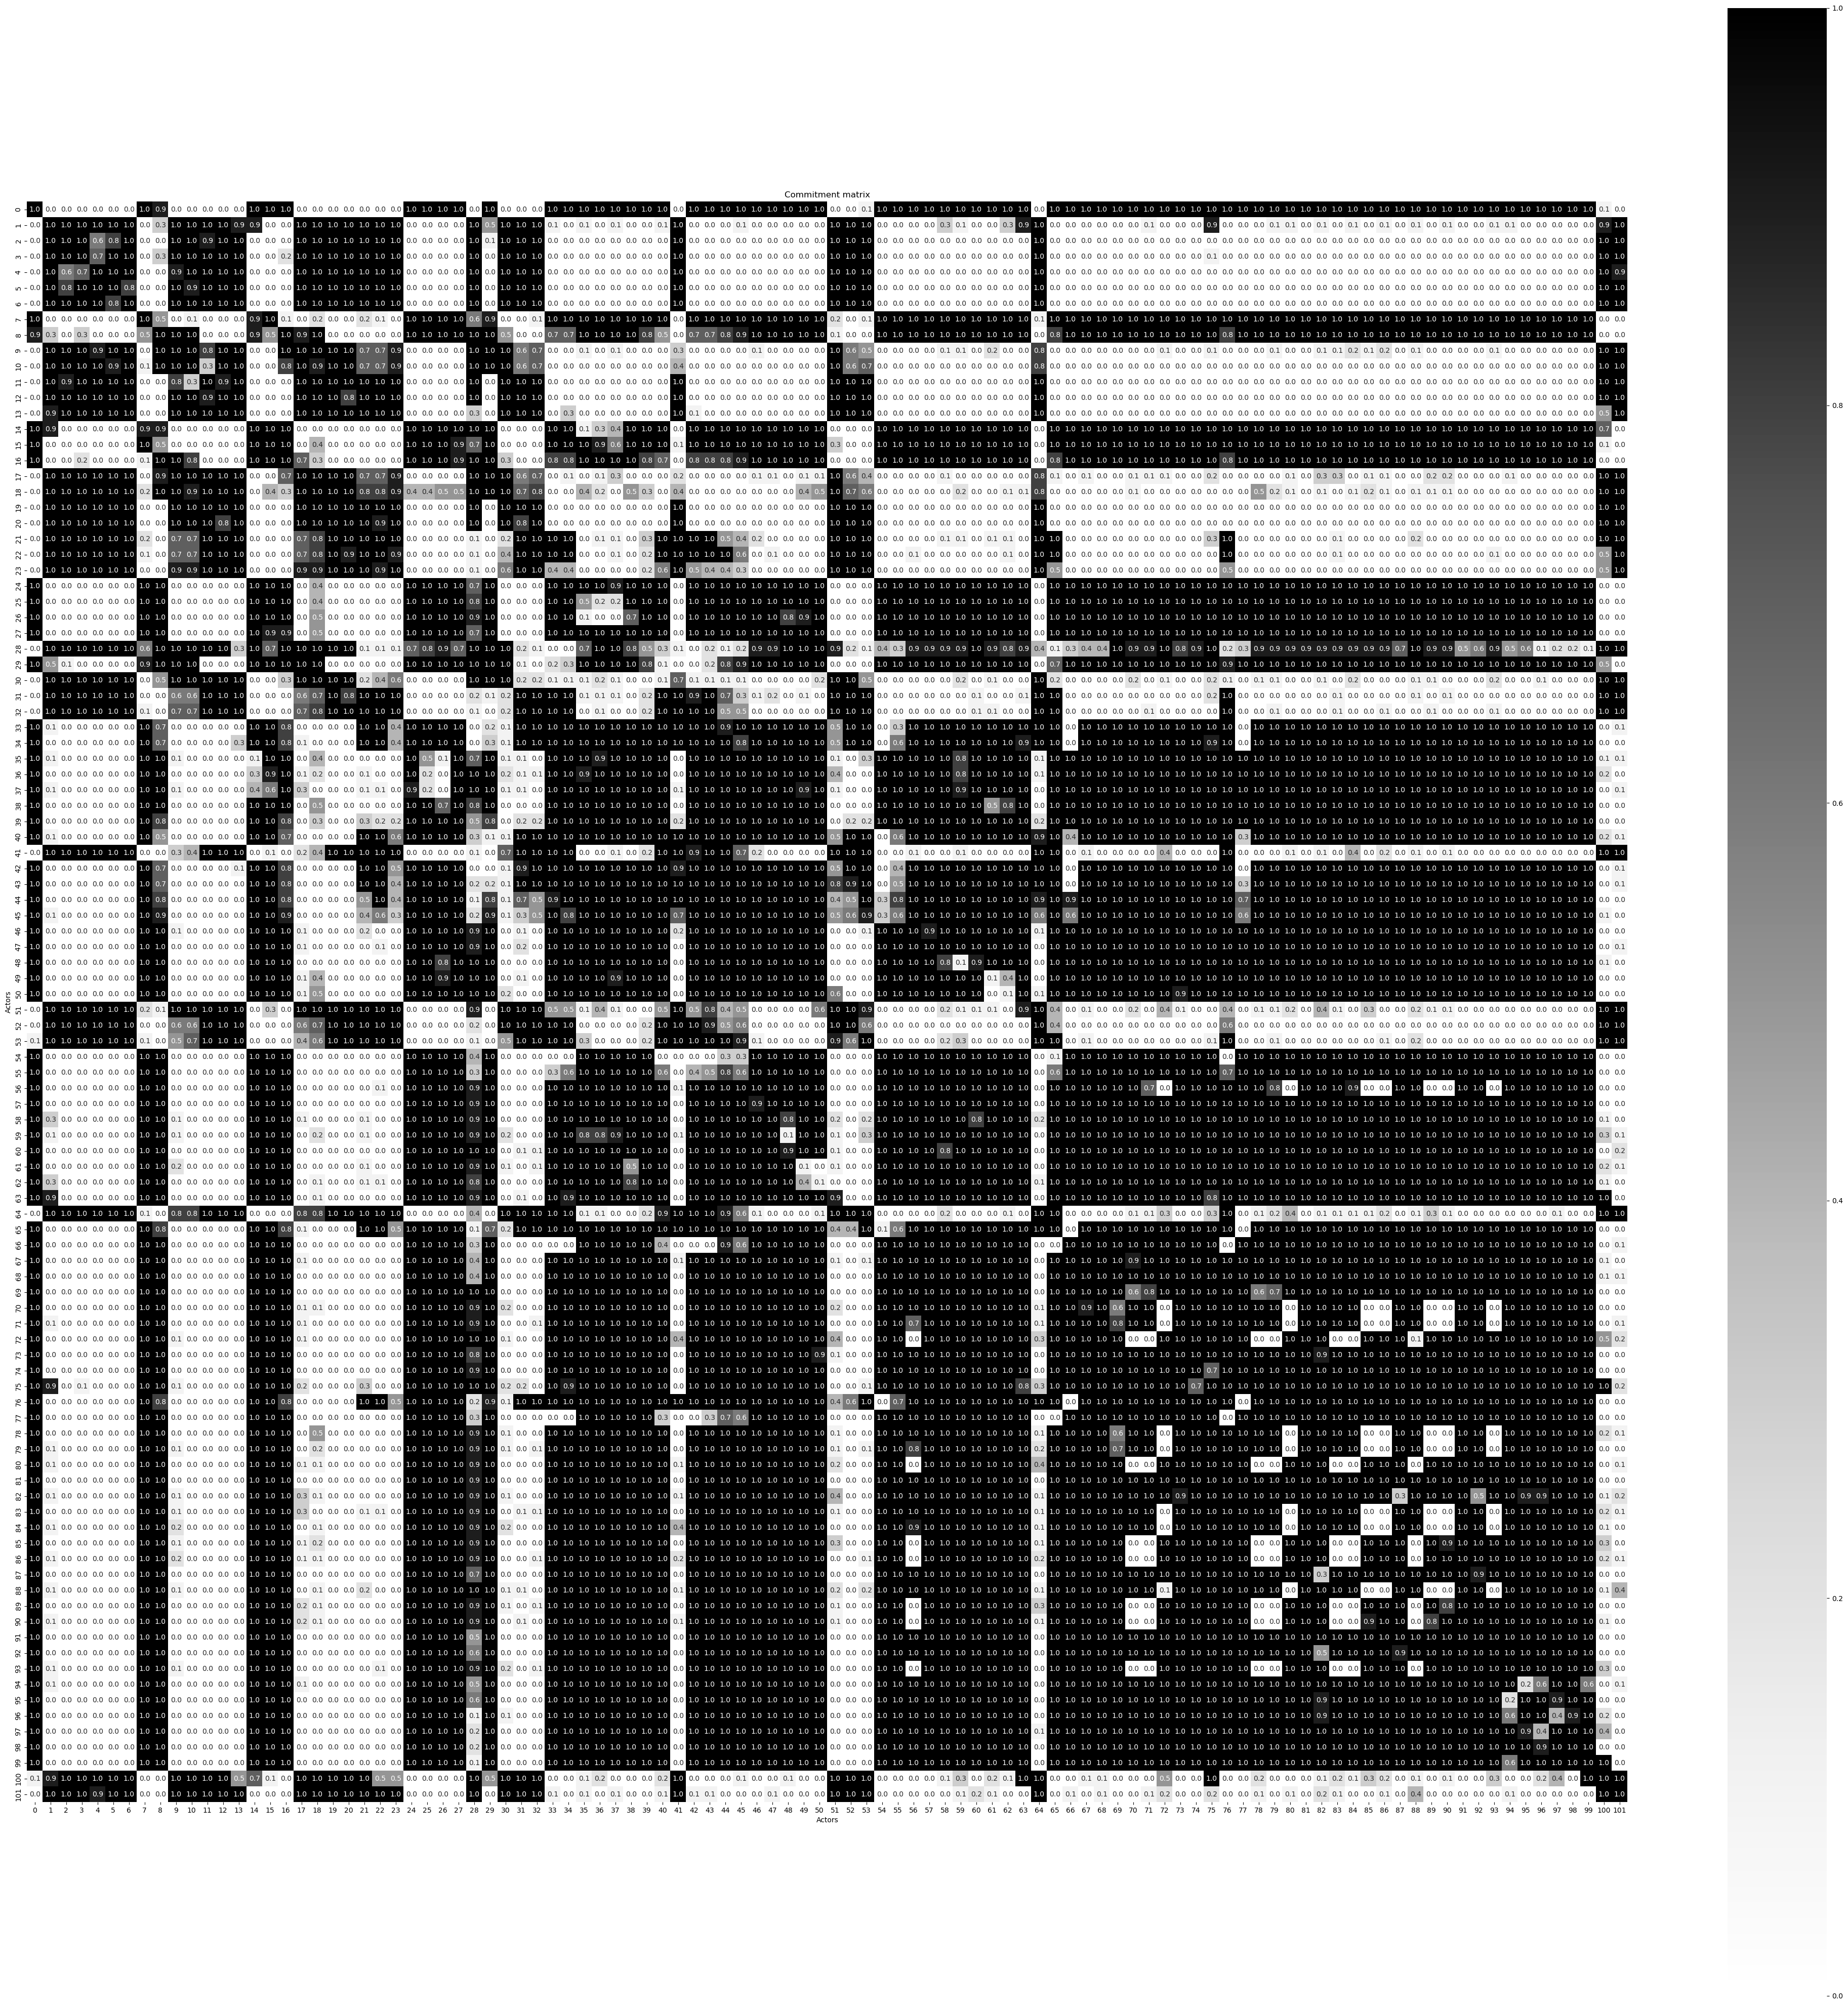

In [187]:
vzl.plot_commitment(matrix)

In [188]:
grid = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/grid.npy')

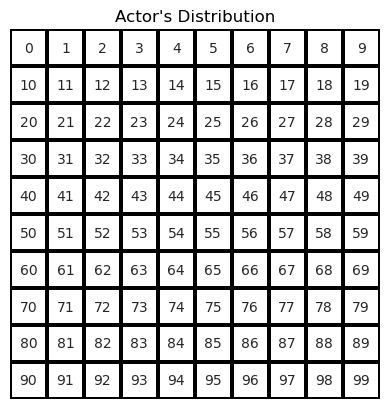

In [189]:
vzl.plot_grid(grid)

In [106]:
coordinations_arr = np.load('/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/cooridation.npy')

In [109]:
coordination = coordinations_arr[91]

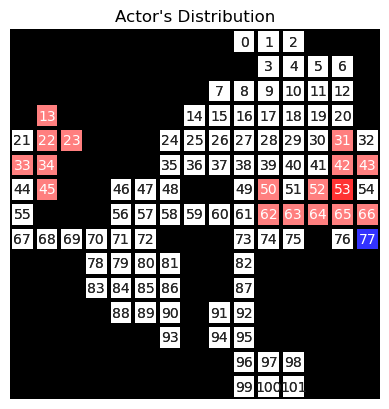

In [110]:
vzl.plot_actions(coordination)

In [35]:
coordination

array([[0, 0, 1, 1, 3, 3, 1, 1, 3, 0],
       [0, 0, 3, 1, 3, 1, 1, 3, 3, 3],
       [3, 3, 3, 3, 3, 2, 6, 3, 3, 3],
       [3, 3, 3, 1, 1, 4, 2, 3, 3, 3],
       [3, 3, 3, 1, 1, 2, 2, 2, 2, 2],
       [3, 3, 3, 1, 2, 2, 2, 2, 2, 1],
       [1, 3, 3, 3, 2, 1, 0, 1, 1, 1],
       [1, 3, 3, 3, 3, 3, 1, 1, 1, 1],
       [0, 3, 3, 3, 1, 3, 1, 1, 1, 0],
       [0, 0, 3, 3, 3, 3, 1, 1, 1, 0]])

In [67]:
import importlib
import visualization as vzl  # Replace 'my_module' with the name of the module you want to import again.

# Reloading the module
importlib.reload(vzl)


<module 'visualization' from '/home/brandm/Documents/Tesis/conflictmodel/conflictmodel/visualization.py'>

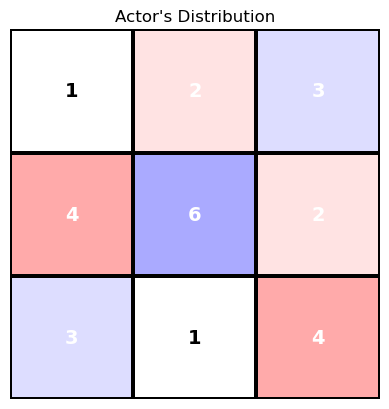

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def plot_actions(grid):
    labels = np.empty_like(grid, dtype=object)
    labels[labels == None] = ''

    # Find indices of specific values in the array
    value_indices = {1: [], 2: [], 3: [], 4: [], 6: []}
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i, j]
            if value in value_indices:
                value_indices[value].append((i, j))

    # Define custom color maps
    cmap_blue = LinearSegmentedColormap.from_list("Blues", ['#FFFFFF', '#AAAAFF'])
    cmap_red = LinearSegmentedColormap.from_list("Reds", ['#FFFFFF', '#FFAAAA'])

    # Create the heatmap with annotations and custom colors for each value
    sns.heatmap(grid, cmap=cmap_blue, annot=labels, fmt='', cbar=False, square=True, linewidths=1.5, linecolor='black',
                mask=np.isin(grid, [2, 4]), cbar_kws={'ticks': []})

    sns.heatmap(grid, cmap=cmap_red, annot=labels, fmt='', cbar=False, square=True, linewidths=1.5, linecolor='black',
                mask=np.isin(grid, [3,6]), cbar_kws={'ticks': []})

    # Add the specific value colors separately using custom masks
    for value, indices in value_indices.items():
        for idx in indices:
            x, y = idx[0], idx[1]
            plt.text(y + 0.5, x + 0.5, str(value), ha='center', va='center', color='white' if value != 1 else 'black',
                     fontweight='bold', fontsize=14)

    # Remove numerical ticks on x and y axes
    plt.xticks([])
    plt.yticks([])

    # Add title (optional)
    plt.title("Actor's Distribution")

    # Display the plot
    plt.show()

# Example grid
grid_values = np.array([
    [1, 2, 3],
    [4, 6, 2],
    [3, 1, 4]
])

plot_actions(grid_values)


In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_grid(grid):
    labels = np.empty_like(grid, dtype=object)
    labels[labels == None] = ''

    # Find indices of zeros in the array
    zero_indices = np.argwhere(grid != 1)

    # Loop through the zero indices and set the corresponding tick labels to '0 to N'
    n = 0
    for idx in zero_indices:
        x, y = idx[0], idx[1]
        labels[x][y] = n
        n += 1

    # Define the colors corresponding to each value
    colors = {
        1: 'black',
        2: 'red',
        3: 'blue',
        4: 'green',
        6: 'yellow'
    }

    # Get the number of rows and columns in the grid
    num_rows, num_cols = grid.shape

    # Create a matrix to represent the colors
    color_matrix = np.empty((num_rows, num_cols), dtype='U10')

    # Assign colors to each cell based on its value
    for i in range(num_rows):
        for j in range(num_cols):
            value = grid[i, j]
            color_matrix[i, j] = colors.get(value, 'white')

    # Plot the colored grid
    plt.imshow(np.zeros_like(color_matrix), cmap='gray', interpolation='none')
    for i in range(num_rows):
        for j in range(num_cols):
            plt.text(j, i, color_matrix[i, j], ha='center', va='center', color='white' if color_matrix[i, j] != 'black' else 'black')

    plt.xticks(range(num_cols))
    plt.yticks(range(num_rows))
    plt.grid(visible=False)
    plt.show()


TypeError: Image data of dtype <U10 cannot be converted to float

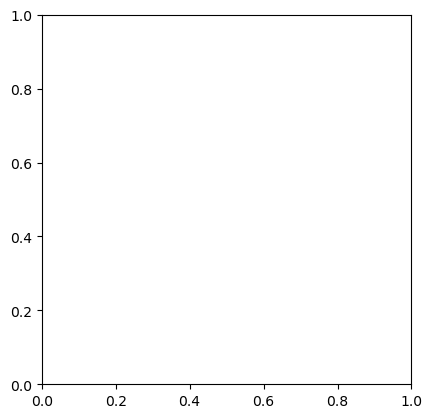

In [46]:
plot_grid(coordination)



# Movie

In [ ]:
N = 49
G = nx.Graph()
G.add_nodes_from(range(N))

# Compute initial positions using spring layout
pos = nx.spring_layout(G, seed=38)

# Compute the best partition using the Louvain algorithm
partition = community.best_partition(G)

# Assign a distinct color to each cluster
cluster_colors = sns.color_palette('hls', n_colors=N).as_hex()

# Define the update function to animate the changes in the graph
def update(frame):
    plt.cla()
    G.clear()  # Clear the graph at each frame
    G.add_nodes_from(range(N))  # Add the N nodes to the graph at each frame
    for i in range(N):
        for j in range(N):
            if i != j and matrix_list[frame][i, j] > 0:  # Exclude self-edges
                G.add_edge(i, j, weight=matrix_list[frame][i, j])

    # Update positions of nodes based on the previous frame's positions
    if frame > 0:
        new_pos = nx.spring_layout(G, seed=38)  # Compute new positions
        for node in pos:
            pos[node] += (new_pos[node] - pos[node]) * 0.1

    # Detect clusters and color nodes accordingly
    partition = community.best_partition(G)
    node_colors = [cluster_colors[partition[node]] for node in G.nodes()]

    node_sizes = 200  # Change node size here

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_labels(G, pos, font_weight='medium', font_size=3)
    plt.title(f'Frame {frame+1}')

# Rest of the code remains the same
# Create the animation using FuncAnimation
fig, ax = plt.subplots()
fig.set_dpi(200)  # Increase the resolution here
animation = FuncAnimation(fig, update, frames=range(len(matrix_list)), interval=75)

# Save the animation as a video file with higher dpi
animation.save('graph_animation3.mp4', writer='ffmpeg', dpi=200)  # Change the file name and writer if desired
